# Graphing PD Call Types by Date

Below I import and clean the data.  I also add a "DateTime" column which allows for manipulation of the date and time format

In [1]:
import numpy as np
import pandas as pd
import matplotlib as pt
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib inline

all_data = pd.read_excel('Event_Detail (2019).xls', header =15)
all_data.dropna(subset =["Event Type"], inplace= True)
all_data = all_data[all_data["Event Number"] != 'Event Number']
# all_data = all_data[type(all_data["Time"]) != Datetime]
all_data.head()
all_data["DateTime"]= pd.to_datetime(all_data['Time'])
all_data['DateTime'] = pd.DatetimeIndex(all_data['DateTime']).date
all_data["DateTime"].value_counts()
# all_data['Time'].dt.strftime('%B %d, %Y')


WARNING *** file size (15716977) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


2019-03-26    234
2019-02-22    227
2019-01-25    221
2019-02-20    216
2019-03-21    215
             ... 
2019-03-17    126
2019-03-03    125
2019-01-06    123
2019-03-02    120
2019-02-10    116
Name: DateTime, Length: 102, dtype: int64

In [15]:
# This shows an agregation of total events by day.
pivot = all_data.pivot_table(values = "Date ", index = 'DateTime', aggfunc="count")
print(pivot)

            Date 
DateTime         
2019-01-01    140
2019-01-02    186
2019-01-03    182
2019-01-04    181
2019-01-05    147
...           ...
2019-04-08    203
2019-04-09    183
2019-04-10    201
2019-04-11    184
2019-04-12    185

[102 rows x 1 columns]


In [3]:
#descriptive statistics on incidents per day
pivot.describe()

,Event Type
count,102.000000
mean,171.352941
std,24.600429
min,116.000000
25%,157.250000
50%,172.500000
75%,186.000000
max,234.000000


In [4]:
#The values of each type of call
events = all_data["Event Type"]
events.value_counts()

TRAFFIC STOP           3421
MEDICAL EMERGENCY      1589
MEDICAL INFORMATION    1267
ALARM                  1200
PED/BIKE STOP           854
                       ... 
SHOOTING                  1
PUBLIC ASSIST             1
MUTUAL AID                1
ANIMAL CONTROL            1
EXPLOSION                 1
Name: Event Type, Length: 128, dtype: int64

In [5]:
call_type_list= events.value_counts().index.tolist()
print(call_type_list)

['TRAFFIC STOP', 'MEDICAL EMERGENCY', 'MEDICAL INFORMATION', 'ALARM', 'PED/BIKE STOP', 'PHONE CALL', '911', 'PATROL AREA CHECK', 'DISTURBANCE', 'FIRE INFORMATION', 'WELFARE CHECK', 'PARKING PROBLEM', 'AUTO BURGLARY', 'PALO ALTO', 'DIRECTED PATROL', 'MEET CITIZEN', 'NON INJURY ACCIDENT', 'SUSPICIOUS CIRCUMSTANCE', 'SUSPICIOUS VEHICLE', 'MUNI CODE VIOLATION', 'SERVICE', 'DISABLED VEH/TRAFF HAZARD', 'INFO GENERAL', 'FOLLOW UP', 'TRESPASS', 'FINANCIAL CRIME', 'SUSPICIOUS PERSON', 'FOUND', 'HIT AND RUN - NON INJURY', 'BE ON THE LOOKOUT', 'ACCIDENT', 'RECKLESS DRIVER/DRIVING', 'PETTY THEFT', 'REPORT ON CONDITIONS', 'FLAGGED DOWN BY CITIZEN IN FIELD', 'OUTSIDE ASSIST', 'SUICIDE', 'GRAND THEFT', 'TOW', 'NOT FOR BROADCAST', 'FOOT PATROL', 'STOLEN VEHICLE', 'CITATION SIGN OFF', 'VEHICLE RELEASE', 'THEFT', 'MISSING PERSON', 'BATTERY', 'TRAFFIC CONTROL', 'ATTEMPT TO CONTACT', 'VANDALISM', 'DISORDERLY CONDUCT', 'ANIMAL', 'ABANDONED VEHICLE', 'WARRANT', 'LOST', 'MINOR INJURY ACCIDENT', 'FIRE ', 'ACC

FileNotFoundError: [Errno 2] No such file or directory: 'PED/BIKE STOP.pdf'

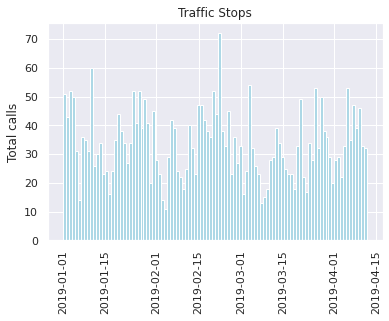

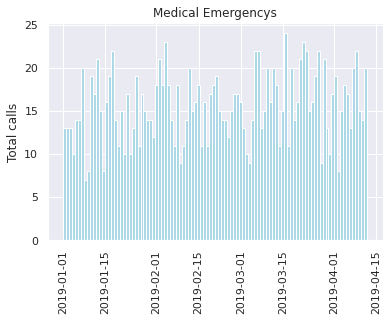

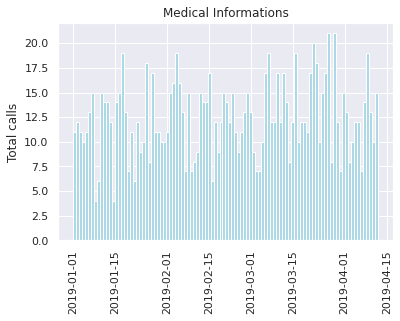

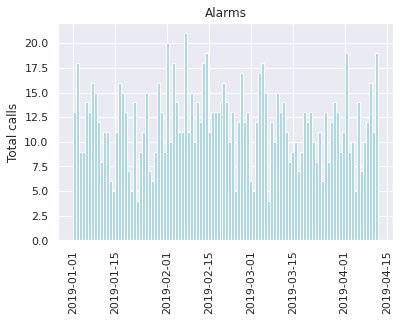

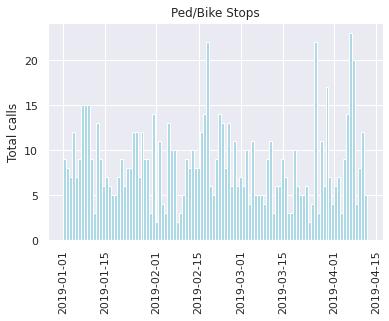

In [9]:
sns.set()

for call_type in call_type_list[:20]:
    total_dates= len(all_data["DateTime"].value_counts())
    data_by_ct= all_data.loc[all_data['Event Type'] == call_type]
    fig, ax = plt.subplots(1,1)
    ax.hist(data_by_ct["DateTime"], bins=total_dates, color='lightblue')
    ax.set_title("{}s".format(call_type.title()))
    ax.set_ylabel("Total calls")
    plt.xticks(rotation=90)
#     plt.savefig('{}.pdf'.format(call_type))
   